In [41]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')

draw_ops = {
    'font_size': 14,
    'node_size': 3 * 300,
    'with_labels': True,
    'font_weight': 'bold',
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}

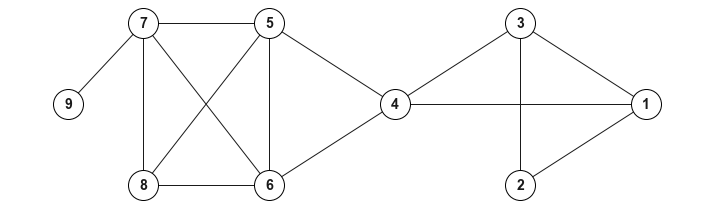

In [42]:
# Create the input graph

adj = {
    1: (2, 3, 4),
    2: (1, 3),
    3: (1, 2, 4),
    4: (1, 3, 5, 6),
    5: (7, 8, 6, 4),
    6: (4, 5, 7, 8),
    7: (9, 8, 6, 5),
    8: (7, 5, 6),
    9: (7,),
}

pos = {
    2: [0.5, -0.1],
    1: [1, 0],
    3: [0.5, 0.1],
    4: [0, 0],
    5: [-0.5, 0.1],
    6: [-0.5, -0.1],
    7: [-1, 0.1],
    8: [-1, -0.1],
    9: [-1.3, 0],
}

G = nx.Graph(adj)

fig, ax = plt.subplots(figsize=(10, 3))
nx.draw(G, ax=ax, **draw_ops, pos=pos)
plt.axis("off")
fig.savefig('q1_a-1.png')
fig

(1, 2): 4.0
(1, 3): 1.0
(1, 4): 9.0
(2, 3): 4.0
(3, 4): 9.0
(4, 5): 10.0
(4, 6): 10.0
(5, 7): 6.0
(5, 8): 3.0
(5, 6): 1.0
(6, 7): 6.0
(6, 8): 3.0
(7, 9): 8.0
(7, 8): 2.0


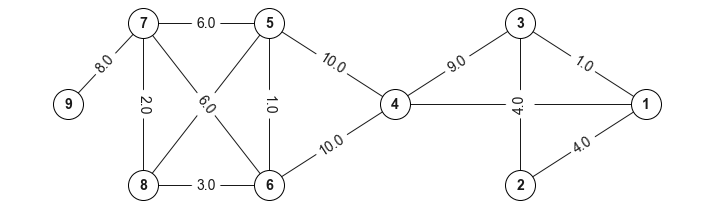

In [43]:
# Calculate the Edge Betweenness Centrality (EBC) for each edge

def dprint(d):
    for k, v in d.items():
        print(f"{k}: {v}")


ebc = nx.edge_betweenness_centrality(G, normalized=False)
ebc = {k: round(ebc[k], 4) for k in ebc}
dprint(ebc)

nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=ebc, ax=ax, font_size=14)
fig.savefig('q1_a-2.png')
plt.show()

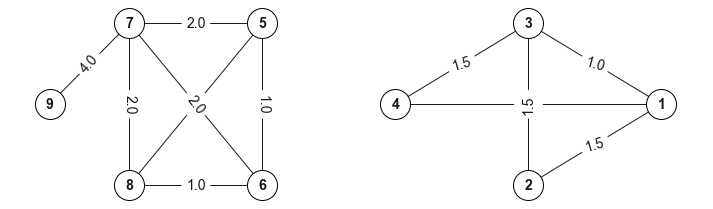

In [44]:
# Perform the first step of the Girvan-Newman algorithm

communities = nx.community.girvan_newman(G)
com = next(communities)
j = 0
while True:
    fig, ax = plt.subplots(figsize=(10, 3))
    for i, c in enumerate(com):
        H = G.subgraph(c)
        hebc = nx.edge_betweenness_centrality(H, normalized=False)
        hebc = {k: round(hebc[k], 4) for k in hebc}
        nx.draw(H, ax=ax, **draw_ops, pos=pos)
        nx.draw_networkx_edge_labels(
            H, pos=pos, edge_labels=hebc, ax=ax, font_size=14)
    if j == 0:
        fig.savefig('p1_a-3.png')
        plt.show()
    plt.close()
    try:
        com = next(communities)
        j += 1
    except StopIteration:
        break